In [44]:
import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd
import osmnx as ox
import numpy as np
import networkx as nx
import pyrosm
import contextily as cx 

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
ox.__version__

'1.1.2'

In [84]:
filename = "data/12-04-23.csv"

In [87]:
df = pd.read_csv(filename, names=["id", "rooms", "area", "rent", "street", "zip_code", "latitude", "longitude"], skiprows=1)

In [88]:
df

id  rooms  area   rent                          street  zip_code  \
0     5197343      1    41   4478  Robert Jacobsens Vej                2300   
1     5231651      3    69   5000  Alleen                              2770   
2     5211190      3    89  10500  Roskildevej                         2610   
3     5205859      2    56   8403  Åbakkevej                           2720   
4     5238576      2    58  12000  Strandboulevarden                   2100   
...       ...    ...   ...    ...                             ...       ...   
1989  5231650      3    68   5700  Birkegade                           2200   
1990  4478130      2    54   6800  Århusgade                           2100   
1991  4438918      2    66   5260  Vigerslevvej                        2500   
1992  4907462      3    78   4900  Solnavej                            2860   
1993  4985909      2    74  18000  Frederiksvej                        2000   

                latitude   longitude  
0     55.6187043          12.5731692  
1     55.6352961          12.6424337  
2     55.670768           12.4525049  
3     55.692219            12.500871  
4     55.7089681          12.5837029  
...                  ...         ...  
1989  55.69000149999999   12.5580169  
1990  55.7058677          12.5789113  
1991  55.64824180000001   12.4923804  
1992  55.74344610000001   12.5017358  
1993  55.675306             12.51815  

[1994 rows x 8 columns]

In [89]:
df.columns

Index(['id', 'rooms', 'area', 'rent', 'street', 'zip_code', 'latitude',
       'longitude'],
      dtype='object')

# Data anomalities

In [103]:
# Uniqueness
duplicates = df.duplicated(subset=['id'])
duplicates_df = df[duplicates]

In [104]:
# Get number of duplicates
duplicates.value_counts()

False    1764
True      230
dtype: int64

In [107]:
df["id"].value_counts()

5059497    2
5126130    2
5202623    2
5107667    2
5107666    2
          ..
5079401    1
4953606    1
4819318    1
4956216    1
4985909    1
Name: id, Length: 1764, dtype: int64

In [108]:
# Display the duplicates - Note: They are not necessarily duplicates as street/door numnber is not included.
#duplicates_df.sort_values(by=['street', 'area'])
df.sort_values(by=['id'])

id  rooms  area   rent                          street  zip_code  \
1436  1503813      1    77  45000  Hjørringgade                        2100   
1373  1503814      2    77  55000  Hjørringgade                        2100   
1500  1503815      1    60  40000  Hjørringgade                        2100   
810   2116616      3   119  14950  Robert Jacobsens Vej                2300   
1448  2391595      3   102  13600  Richard Mortensens Vej              2300   
...       ...    ...   ...    ...                             ...       ...   
970   5241629      1    29   7200  Vanløse Allé                        2720   
66    5241631      1    35   6800  Kobbelvænget                        2700   
1044  5241679      4    96  16500  Else Afelts Vej                     2300   
1049  5241681      3   153  20000  Robert Jacobsens Vej                2300   
1126  5241713      2    76  13170  Islands Brygge                      2300   

                latitude   longitude  
1436  55.7059744          12.5882955  
1373  55.7059744          12.5882955  
1500  55.7060857          12.5885685  
810   55.6205107          12.5735633  
1448  55.6207888          12.5711196  
...                  ...         ...  
970   55.6884627          12.4943031  
66    55.7112967          12.4806054  
1044  55.6194089          12.5679844  
1049  55.6202704          12.5734617  
1126  55.6618119          12.5696679  

[1994 rows x 8 columns]

In [93]:
# Get number of different zip codes
df['zip_code'].value_counts()

2300    782
2450    259
2610    246
2700    130
2500     86
       ... 
1358      1
1057      1
1660      1
1150      1
1458      1
Name: zip_code, Length: 81, dtype: int64

In [94]:
# Get number of nan values per columns
for col in df.columns:
    print(col)
    print(df[col].isnull().values.sum())

id
0
rooms
0
area
0
rent
0
street
0
zip_code
0
latitude
0
longitude
0


In [95]:
# Dataframe with nans dropped
df2 = df.dropna()

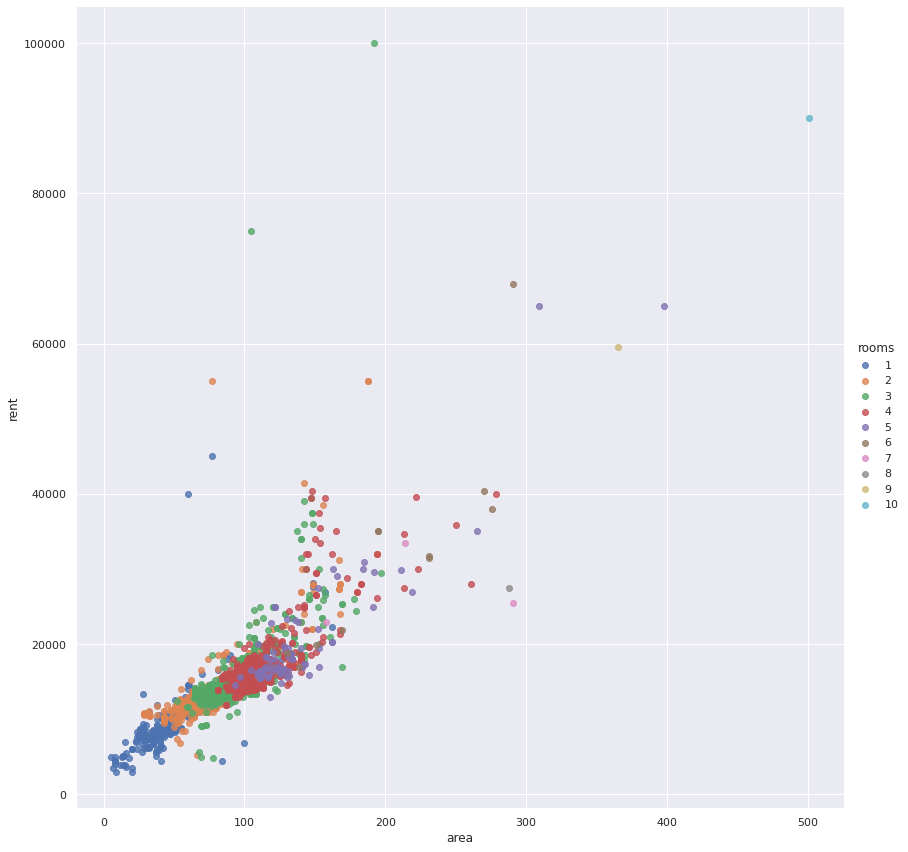

In [96]:
# Plotting 

import seaborn as sns

sns.set(rc={'figure.figsize':(26,12)})
sns.lmplot('area', 'rent', data=df2, hue='rooms', fit_reg=False, height=12, aspect=1)

plt.show()

# Data wrangling (normalize)

In [81]:
df2["rent_norm"] = df2["rent"] / df2["area"]

In [82]:
df2

rooms  area   rent                          street  zip_code  \
5197343      1    41   4478  Robert Jacobsens Vej                2300   
5231651      3    69   5000  Alleen                              2770   
5211190      3    89  10500  Roskildevej                         2610   
5205859      2    56   8403  Åbakkevej                           2720   
5238576      2    58  12000  Strandboulevarden                   2100   
...        ...   ...    ...                             ...       ...   
5231650      3    68   5700  Birkegade                           2200   
4478130      2    54   6800  Århusgade                           2100   
4438918      2    66   5260  Vigerslevvej                        2500   
4907462      3    78   4900  Solnavej                            2860   
4985909      2    74  18000  Frederiksvej                        2000   

                   latitude   longitude   rent_norm  
5197343  55.6187043          12.5731692  109.219512  
5231651  55.6352961          12.6424337   72.463768  
5211190  55.670768           12.4525049  117.977528  
5205859  55.692219            12.500871  150.053571  
5238576  55.7089681          12.5837029  206.896552  
...                     ...         ...         ...  
5231650  55.69000149999999   12.5580169   83.823529  
4478130  55.7058677          12.5789113  125.925926  
4438918  55.64824180000001   12.4923804   79.696970  
4907462  55.74344610000001   12.5017358   62.820513  
4985909  55.675306             12.51815  243.243243  

[1994 rows x 8 columns]

In [83]:
# Saving the file with added norm column
df2.to_csv(filename.split(".")[0] + "_norm" + ".csv")

# Geopandas

In [60]:
#geometry = gdp.points_from_xy(df2.longitude, df2.latitude, crs="EPSG:4326")
gdf = gpd.GeoDataFrame(df2, geometry=gpd.points_from_xy(df2.longitude,df2.latitude, crs="EPSG:4326"))

In [61]:
gdf

rooms  area   rent                          street  zip_code   latitude  \
0         1    26   8650  Finsensvej                          2000  55.681189   
1         2    38  11800  Finsensvej                          2000  55.681189   
2         1    41   4492  Nordre Fasanvej                     2000  55.695098   
3         1    41   4478  Robert Jacobsens Vej                2300  55.618704   
4         1    47   9600  Torvegade                           1400  55.671192   
...     ...   ...    ...                             ...       ...        ...   
1881      3    68   5700                       Birkegade      2200  55.690001   
1882      2    54   6800                       Århusgade      2100  55.705868   
1883      2    66   5260                    Vigerslevvej      2500  55.648242   
1884      3    78   4900                        Solnavej      2860  55.743446   
1885      2    74  18000                    Frederiksvej      2000  55.675306   

      longitude   rent_norm                   geometry  
0     12.518624  332.692308  POINT (12.51862 55.68119)  
1     12.518624  310.526316  POINT (12.51862 55.68119)  
2     12.533609  109.560976  POINT (12.53361 55.69510)  
3     12.573169  109.219512  POINT (12.57317 55.61870)  
4     12.593326  204.255319  POINT (12.59333 55.67119)  
...         ...         ...                        ...  
1881  12.558017   83.823529  POINT (12.55802 55.69000)  
1882  12.578911  125.925926  POINT (12.57891 55.70587)  
1883  12.492380   79.696970  POINT (12.49238 55.64824)  
1884  12.501736   62.820513  POINT (12.50174 55.74345)  
1885  12.518150  243.243243  POINT (12.51815 55.67531)  

[1880 rows x 9 columns]

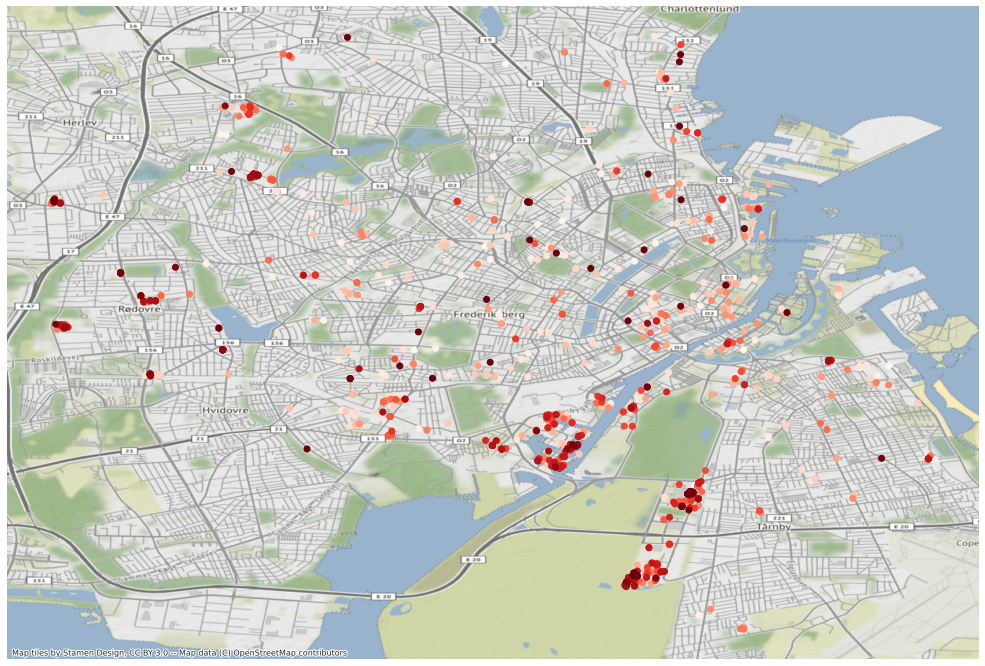

In [62]:
ax = gdf.plot(c=gdf["rent"], cmap='Reds', legend=True) #color="black")
ax.set_axis_off()
cx.add_basemap(ax, crs=gdf.crs)

cmap = plt.cm.get_cmap('cool')
cmap.set_under('red')

# Postal Code data

Note: The data is found here: https://github.com/mortenscheel/postnumre-geojson-clipped

In [130]:
postal_codes = gpd.read_file("data/postnumre-clipped-simplified.geojson")

In [131]:
postal_codes

href    nr         navn  \
0     https://dawa.aws.dk/postnumre/1050  1050  København K   
1     https://dawa.aws.dk/postnumre/1051  1051  København K   
2     https://dawa.aws.dk/postnumre/1052  1052  København K   
3     https://dawa.aws.dk/postnumre/1053  1053  København K   
4     https://dawa.aws.dk/postnumre/1054  1054  København K   
...                                  ...   ...          ...   
1084  https://dawa.aws.dk/postnumre/9940  9940         Læsø   
1085  https://dawa.aws.dk/postnumre/9970  9970     Strandby   
1086  https://dawa.aws.dk/postnumre/9981  9981        Jerup   
1087  https://dawa.aws.dk/postnumre/9982  9982        Ålbæk   
1088  https://dawa.aws.dk/postnumre/9990  9990       Skagen   

     stormodtageradresser                                           kommuner  \
0                    None  [ { "href": "https:\/\/dawa.aws.dk\/kommuner\/...   
1                    None  [ { "href": "https:\/\/dawa.aws.dk\/kommuner\/...   
2                    None  [ { "href": "https:\/\/dawa.aws.dk\/kommuner\/...   
3                    None  [ { "href": "https:\/\/dawa.aws.dk\/kommuner\/...   
4                    None  [ { "href": "https:\/\/dawa.aws.dk\/kommuner\/...   
...                   ...                                                ...   
1084                 None  [ { "href": "https:\/\/dawa.aws.dk\/kommuner\/...   
1085                 None  [ { "href": "https:\/\/dawa.aws.dk\/kommuner\/...   
1086                 None  [ { "href": "https:\/\/dawa.aws.dk\/kommuner\/...   
1087                 None  [ { "href": "https:\/\/dawa.aws.dk\/kommuner\/...   
1088                 None  [ { "href": "https:\/\/dawa.aws.dk\/kommuner\/...   

                                ændret                        geo_ændret  \
0     2018-04-30T15:23:13.528000+00:00  2014-11-04T16:01:00.879000+00:00   
1     2018-04-30T15:23:13.528000+00:00  2016-11-10T21:36:32.077999+00:00   
2     2018-04-30T15:23:13.528000+00:00  2014-11-04T16:01:00.879000+00:00   
3     2018-04-30T15:23:13.528000+00:00  2014-11-04T16:01:00.879000+00:00   
4     2018-04-30T15:23:13.528000+00:00  2014-11-04T16:01:00.879000+00:00   
...                                ...                               ...   
1084  2018-04-30T15:23:13.528000+00:00  2014-11-04T16:01:00.879000+00:00   
1085  2018-04-30T15:23:13.528000+00:00  2014-11-04T16:01:00.879000+00:00   
1086  2018-04-30T15:23:13.528000+00:00  2014-11-04T16:01:00.879000+00:00   
1087  2018-04-30T15:23:13.528000+00:00  2014-11-04T16:01:00.879000+00:00   
1088  2018-04-30T15:23:13.528000+00:00  2014-11-04T16:01:00.879000+00:00   

      geo_version dagi_id                                           geometry  
0               1  191050  POLYGON ((12.58424 55.67914, 12.58435 55.67996...  
1               2  191051  MULTIPOLYGON (((12.58775 55.68087, 12.58945 55...  
2               1  191052  MULTIPOLYGON (((12.58845 55.67919, 12.58900 55...  
3               1  191053  POLYGON ((12.59081 55.67853, 12.59128 55.67825...  
4               1  191054  MULTIPOLYGON (((12.58775 55.67896, 12.58845 55...  
...           ...     ...                                                ...  
1084            1  199940  MULTIPOLYGON (((10.87004 57.25799, 10.87327 57...  
1085            1  199970  POLYGON ((10.43530 57.49393, 10.45462 57.49448...  
1086            1  199981  POLYGON ((10.34774 57.52611, 10.35645 57.54168...  
1087            1  199982  POLYGON ((10.27069 57.61845, 10.32013 57.63489...  
1088            1  199990  POLYGON ((10.34367 57.64535, 10.43977 57.69152...  

[1089 rows x 10 columns]

In [132]:
postal_codes.crs, gdf.crs

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

## Getting only Postal Codes that the rental points are in

Later, we might want to limit the Postal Codes by Copenhagen instead, if we for some reason want to also show postal codes in Copenhagen that we don't have data points of. We might also consider aggregating some postal codes that a split up too granuarily.

In [133]:
# Joining postal and points
postal_codes['nr']=postal_codes['nr'].astype(int)
gdf2 = gdf.merge(postal_codes, left_on='zip_code', right_on="nr", how="left")

In [134]:
gdf2

rooms  area   rent                          street  zip_code   latitude  \
0         1    26   8650  Finsensvej                          2000  55.681189   
1         2    38  11800  Finsensvej                          2000  55.681189   
2         1    41   4492  Nordre Fasanvej                     2000  55.695098   
3         1    41   4478  Robert Jacobsens Vej                2300  55.618704   
4         1    47   9600  Torvegade                           1400  55.671192   
...     ...   ...    ...                             ...       ...        ...   
1875      3    68   5700                       Birkegade      2200  55.690001   
1876      2    54   6800                       Århusgade      2100  55.705868   
1877      2    66   5260                    Vigerslevvej      2500  55.648242   
1878      3    78   4900                        Solnavej      2860  55.743446   
1879      2    74  18000                    Frederiksvej      2000  55.675306   

      longitude   rent_norm                 geometry_x  \
0     12.518624  332.692308  POINT (12.51862 55.68119)   
1     12.518624  310.526316  POINT (12.51862 55.68119)   
2     12.533609  109.560976  POINT (12.53361 55.69510)   
3     12.573169  109.219512  POINT (12.57317 55.61870)   
4     12.593326  204.255319  POINT (12.59333 55.67119)   
...         ...         ...                        ...   
1875  12.558017   83.823529  POINT (12.55802 55.69000)   
1876  12.578911  125.925926  POINT (12.57891 55.70587)   
1877  12.492380   79.696970  POINT (12.49238 55.64824)   
1878  12.501736   62.820513  POINT (12.50174 55.74345)   
1879  12.518150  243.243243  POINT (12.51815 55.67531)   

                                    href    nr           navn  \
0     https://dawa.aws.dk/postnumre/2000  2000  Frederiksberg   
1     https://dawa.aws.dk/postnumre/2000  2000  Frederiksberg   
2     https://dawa.aws.dk/postnumre/2000  2000  Frederiksberg   
3     https://dawa.aws.dk/postnumre/2300  2300    København S   
4     https://dawa.aws.dk/postnumre/1400  1400    København K   
...                                  ...   ...            ...   
1875  https://dawa.aws.dk/postnumre/2200  2200    København N   
1876  https://dawa.aws.dk/postnumre/2100  2100    København Ø   
1877  https://dawa.aws.dk/postnumre/2500  2500          Valby   
1878  https://dawa.aws.dk/postnumre/2860  2860         Søborg   
1879  https://dawa.aws.dk/postnumre/2000  2000  Frederiksberg   

     stormodtageradresser                                           kommuner  \
0                    None  [ { "href": "https:\/\/dawa.aws.dk\/kommuner\/...   
1                    None  [ { "href": "https:\/\/dawa.aws.dk\/kommuner\/...   
2                    None  [ { "href": "https:\/\/dawa.aws.dk\/kommuner\/...   
3                    None  [ { "href": "https:\/\/dawa.aws.dk\/kommuner\/...   
4                    None  [ { "href": "https:\/\/dawa.aws.dk\/kommuner\/...   
...                   ...                                                ...   
1875                 None  [ { "href": "https:\/\/dawa.aws.dk\/kommuner\/...   
1876                 None  [ { "href": "https:\/\/dawa.aws.dk\/kommuner\/...   
1877                 None  [ { "href": "https:\/\/dawa.aws.dk\/kommuner\/...   
1878                 None  [ { "href": "https:\/\/dawa.aws.dk\/kommuner\/...   
1879                 None  [ { "href": "https:\/\/dawa.aws.dk\/kommuner\/...   

                                ændret                        geo_ændret  \
0     2018-05-18T21:15:28.822001+00:00  2018-05-18T21:15:28.822001+00:00   
1     2018-05-18T21:15:28.822001+00:00  2018-05-18T21:15:28.822001+00:00   
2     2018-05-18T21:15:28.822001+00:00  2018-05-18T21:15:28.822001+00:00   
3     2019-03-14T22:13:12.119000+00:00  2019-03-14T22:13:12.119000+00:00   
4     2019-09-13T21:13:15.692000+00:00  2019-09-13T21:13:15.692000+00:00   
...                                ...                               ...   
1875  2019-08-09T21:11:20.875000+00:00  2019-08-09T21:11:20.87

In [135]:
# Select only postal code geometries that have a data point in them
postal_codes_current = postal_codes[postal_codes["nr"].isin(set(gdf2["zip_code"]))]

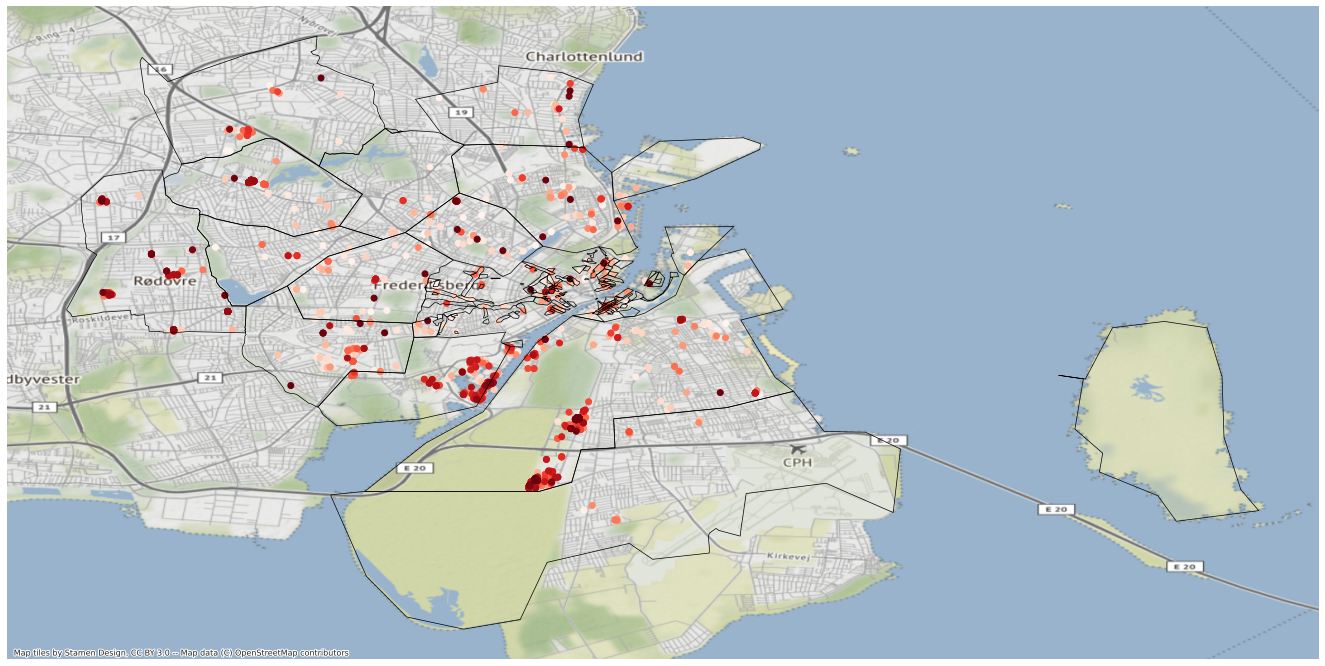

In [136]:
ax = gdf.plot(c=gdf["rent"], cmap='Reds', legend=True) #color="black")
ax2 = postal_codes_current.plot(ax=ax, facecolor="none", edgecolor='black', lw=0.7)

ax.set_axis_off()
cx.add_basemap(ax, crs=gdf.crs)

cmap = plt.cm.get_cmap('cool')
cmap.set_under('red')

# City Areas

In [ ]:
cph_areas = gpd.read_file("data/rode.geojson")

In [137]:
city_areas = postal_codes.dissolve(by='navn')

In [151]:
city_areas_current = city_areas.loc[list(set(postal_codes_current["navn"]))]

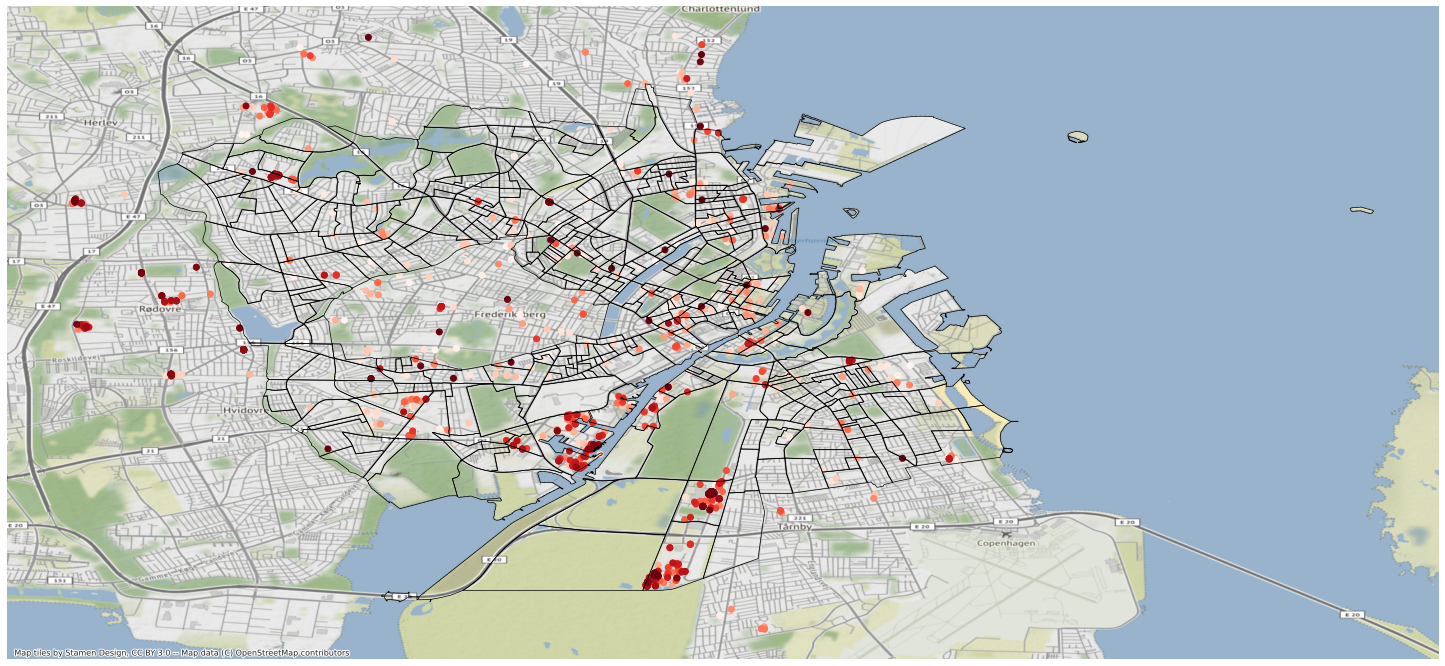

In [162]:
ax = gdf.plot(c=gdf["rent_norm"], cmap='Reds', legend=True) #color="black")
ax2 = cph_areas.plot(ax=ax, facecolor="none", edgecolor='black', lw=0.7)

ax.set_axis_off()
cx.add_basemap(ax, crs=gdf.crs)

cmap = plt.cm.get_cmap('cool')
cmap.set_under('red')

In [159]:
cph_areas_bydel = cph_areas.dissolve(by='bydel')

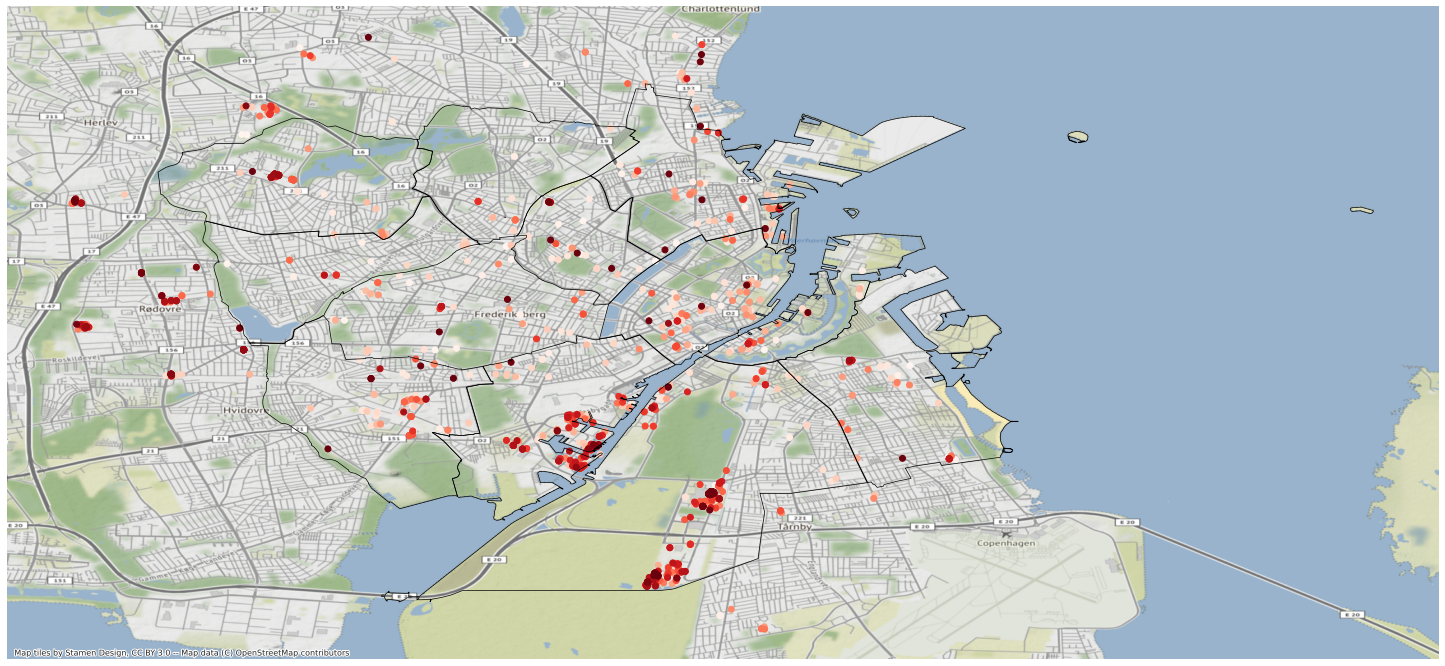

In [163]:
ax = gdf.plot(c=gdf["rent_norm"], cmap='Reds', legend=True) #color="black")
ax2 = cph_areas_bydel.plot(ax=ax, facecolor="none", edgecolor='black', lw=0.7)

ax.set_axis_off()
cx.add_basemap(ax, crs=gdf.crs)

cmap = plt.cm.get_cmap('cool')
cmap.set_under('red')